(sec:intro)=
# Uvod v procesiranje signalov

V tem uvodnem poglavju, bomo poskušali v grobem očrtati motivacijo za to knjigo in tudi vsebino, ki jo lahko pričakujete v sledečih poglavjih.

## Kaj je procesiranje signalov?
Termin *procesiranje signalov* uporabljamo za označitev različnih metod obdelave izmerjenih podatkov z namenom, da razkrijemo informacije skritev v takih meritvah. S procesiranjem signalom želimo identificirati/karakterizirati različne fizikalne procese, kot primer takih procesov lahko vidimo klasične inženirske izzive (npr.: napake na ležajih, dinamske lastnosti struktur), pa tudi izzive v biologiji (npr.: sekvenciranje genoma), astronomiji (npr.: merjenje črne luknje), družboslovju (npr.: širjenje corona virusa) in podobno.

Kot primer si lahko pogledamo meritve na novem/poškodovanem ležaju (za podrobnosti, glejte vir {cite:t}`slavic2011typical`). Slika spodaj prikazuje meritev sile na dobrem in dveh poškodovanih ležajih. V meritvah vidimo določene razlike, ampak ali lahko iz meritev identificiramo *tip* poškodbe? Nadalje ali lahko iz meritev identificiramo *velikost* poškodbe? Na ta in podobna vprašanja bomo poskušali odgovoriti tekom te knjige.

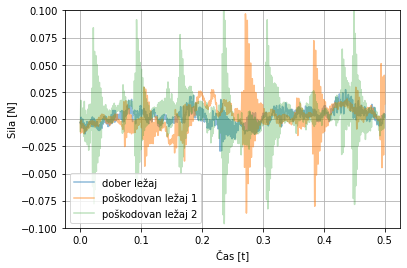

In [1]:
import numpy as np
import matplotlib.pyplot as plt

new = np.load('./data/bearing/new 1A.npy')
radial = np.load('./data/bearing/radial Low 1A.npy')
contamination = np.load('./data/bearing/contam low 2A.npy')
time = np.arange(len(new)) * 1./5000

sel = time<0.5
plt.plot(time[sel], new[sel, 2], alpha=0.5, label='dober ležaj')
plt.plot(time[sel], radial[sel, 2], alpha=0.5, label='poškodovan ležaj 1')
plt.plot(time[sel], contamination[sel, 2], alpha=0.3, label='poškodovan ležaj 2')
plt.xlabel('Čas [t]')
plt.ylabel('Sila [N]')
plt.ylim(-0.1, 0.1)
plt.grid()
plt.legend()
plt.show()

Kot naslednji primer, je spodaj prikazana slika frekvenčne prenosne funkcije (*ang.* FRF, Frequency Response Function), ki za linearni časovno invariantni sistem (glejte poglavje {ref}`sec:konvolucija_LTI`) v frekvenčni domeni povezuje vzbujanje sistema z njegovim odzivom (primer je vzet iz paketa pyUFF). Zadnji stavek vsebuje veliko terminov, ki jih v nadaljevanju razdelali in spoznali. Pravilna identifikacija frekvenčne prenosne funkcije je zelo pomembna za karakterizacijo dinamskih sistemov in kako jo pravilno identificiramo bomo v celoti razumeli šele proti koncu te knjige.

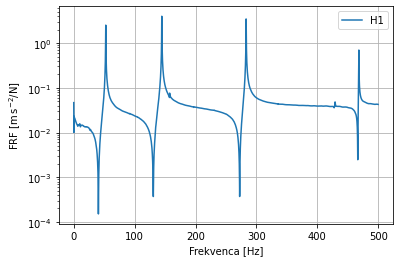

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyuff

uff = pyuff.UFF('./data/uff/beam.uff').read_sets(setn=4)
fr = uff['x']
H1 = uff['data']

sel = fr<500
plt.semilogy(fr[sel], np.abs(H1[sel]), label='H1')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('FRF [m$\,$s$^{-2}$/N]')
plt.grid()
plt.legend()
plt.show()

## Kaj je sistem?

Dinamske in druge sisteme ponavadi poskušamo opisati na podlagi modelov; parametre modelov pa identificirati s procesiranjem signalov. Spodnja slika prikazuje poljuben sistem, katerega vzbujanje opišemo v času s $x(t)$, odziv pa s $y(t)$. Kot primer vzbujanja $x(t)$ sistema si lahko predstavljamo silo, ki deluje na neko maso, kot odziv $y(t)$ pa napetost na zaznavalu pospeška ali zvočnega tlaka. Odziv je ponavadi res napetost, ki je ponavadi proporcionalna neki merjeni veličini (npr.: pospešek, zvočni tlak), vendar pa je odziv lahko povezan tudi npr. z intenziteto slikovnega elementa v sliki (glejte {cite:t}`gorjup2021still`). 

![sistem-in-out](./images/sistem-in-out.svg)

Tukaj se bomo omejili na takšne sisteme kjer je odziv rezultat preteklega in trenutnega vzbujanja (takšnim sistemom rečemo, da so *kavzalni*). Podobno se bomo omejili samo na takšne sisteme, kjer odziv ne vpliva nazaj na vzbujanje. Nadalje bomo v začetku predpostavili, da imamo samo eno vzbujanje in samo en odziv.

## Kaj linearni časovno invariantni sistem?

Ta knjiga bo osredotočena samo na linearne časovno invariantne (LČI) sisteme (ang. *linear time invariant systems*, pogosto tudi *LTI systems*). Podrobneje si bomo take sisteme pogledali v poglavju {ref}`sec:konvolucija_LTI`, tukaj, v uvodu, se jih bomo zgoj dotaknili. LČI sistemi se na idealni impulz odzovejo z impulznim odzivom, ki ga oznalimo s $h(t)$. Vzbujanje $x(t)$ in odziv $y(t)$ so za LČI sistemo povezani z:

$$
y(t)=h(t) * x(t),
$$

kjer znak $*$ označuje matematično operacijo konvolucije. Ker je sistem linearen, bo sprememba na strani vzbujanja vodilo v proporcionalno spremembo na strani odziva:

$$
k\,y(t)=h(t) * (k\,x(t)),
$$

ker je sistem časovno invarianten, bo časovna sprememba na strani vzbujanja (npr. zakasnitev vzbujanja) vodila v isto časovno spremembo na strani odziva:

$$
y(t-\tau)=h(t) * x(t-\tau).
$$

Konvolucijo bomo spoznali pozneje in v času ni ravno enostavna operacija; k sreči bomo v poglavju (TBA) spoznali, da *Fourierova transformacija* konvolucijo v časovni domeni preoblikuje v preprosto množenje v frekvenčni domeni:

$$
Y(f)=H(f)\,X(f).
$$
Kjer $f$ označuje frekvenco, $Y(f)$, $H(f)$ in $X(f)$ pa predstavljajo Fourierovo transformacijo $y(t)$, $h(t)$ in $x(t)$.

Sistem lahko enolično identificiramo, če identificiramo $H(t)$ v frekvenčni domeni. Če sta vzbujanje $X(f)$ in odziv $Y(f)$ v frekvenčni domeni znana, je identifikacija (teoretično) skrajno enostavna $H(f)=Y(f)/X(f)$. V praksi je problem v tem, da je meritev vzbujanja in odziva obremenjena z merilnimi in drugimi negotovostmi; Sistem realnega sistema prikazuje spodnja slika; $n_x(t)$ in $n_y(t)$ predstavljata šum na strani vzbujanja in odziva, $x_m(t)$ in $y_m(t)$ pa predstavljata izmerjeno vzbujanje in izmerjeni odziv. 

![sistem-in-out-sum](./images/sistem-in-out-sum.svg)

Izmerjeno vzbujanje $x_m(t)$ je očitno drugačno od tistega, ki vzbuja sistem $x(t)$ in izmerjeni odziv $y_m(t)$ je očitno durgače kakor je dejanski odziv $y(t)$. Glede na merilne in druge negotovosti nimamo dostopa do dejanskega vzbujanja $x(t)$ in dejanskega odziva $y(t)$ in zato frekvenčne prenosne funkcije $H(f)$ ne moremo določiti. V poglavju (TBA) si bomo pogledali kako $H(f)$ ocenimo na podlagi veličin, ki jih lahko izmerimo ($x_m(t)$ in $y_m(t)$) in to ob dejstvu, da tako negotovost v meritvi, kakor tudi vzbujanje lahko naključno porazdeljeno. Takrat bomo govorili o cenilki frekvenčne prenosne funkcije $\tilde{H}(f)$ (glejte poglavje (TBA)).

## Zvezni/diskretni podatki

Inženirski procesi so ponavadi zvezni in jih zaznavamo s pomočjo različnih zaznaval, ki generirajo fizikalno merljivo veličino, t.i. signal. Signal ali časovna zgodovina je ponavadi tudi *zvezna* veličina (včasih bomo slišali tudi *analogna* veličina). Zaradi obdelave podatkov z računalnikom, te zvezne veličine diskretiziramo (glejte poglavje TBA). Ponavadi je taka diskretizacija narejena s konstantnim časovnim korakom. Spodnja slika prikazuje zvezno in diskretno časovno vrst. V splošnem ne govorimo niti o signalih, niti o časovnih vrstah, pač pa o podatkih (ang. *data*).

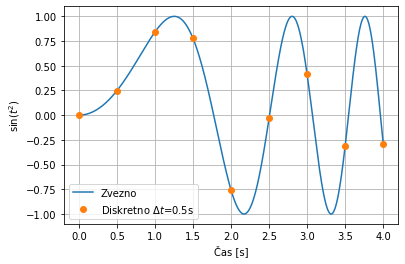

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# na računalniku zvezne časovne vrste dejansko ne moremo generirati
# "zvezna" bo samo dosti bolj gosta
t, dt = np.linspace(0,4,1000, retstep=True)
t2, dt2 = np.linspace(0,4,9, retstep=True)

plt.plot(t, np.sin(t**2), label='Zvezno') 
plt.plot(t2, np.sin(t2**2), 'o',label='Diskretno $\\Delta t$=0.5s')
plt.xlabel('Čas [s]')
plt.ylabel('$\\sin(t^2)$')
plt.grid()
plt.legend()
plt.show()

## Klasifikacija podatkov

Klasifikacija podatkov (prirejeno po {cite:t}`bendat_2011,shin2008`) je prikazana na spodnji sliki.

![klasifikacija_podatkov](./images/klasifikacija_podatkov.svg)

Podatke najprej delimo na:
* **deterministične** (kdaj slišimo tudi *določljivostne*) to so podatki, ki imajo vrednosti v času enolično določene in
* **naključne** kjer vrednosti v nekem trenutku ekzaktno ne vemo, je pa ta lahko določena z verjetnostno porazdelitvijo.

Primer determinističnih podatkov je funkcija:

$$
x(t) = \sin(t),
$$

primer naključnih pa višina gladine razburkanega morja. Pri klasifikaciji podatkov ne smemo pozabiti, da imamo lahko podatke sestavljene iz determinističnega in naključnega dela.

**Deterministične** podatke naprej delimo na **periodične**, ki se torej po določenem času (periodi) ponovijo in take, ki to niso, torej **ne-periodične**.

**Naključne** podatke naprej delimo glede na to ali se statistična porazdelitev, ki definirajo naključne podatke s časom spreminja (**nestacionarni**) ali se ne spreminja (**stacionarni**). Sicer pa govorimo tudi o šibki stacionarnosti, ko se prva dva statistična momenta porazdelitve (povprečna vrednost in kovarianca) s časom ne spreminjata. O močni stacionarnostni govorimo, ko se tudi višji statistični momenti (vključno s križni momenti) s časom ne spreminjajo. Če je pri stacionarnem procesu povprečno vrednost in kovarianco enaka ne glede na to ali ta dva statistična momenta določimo iz *časovne vrste* ali iz *naključne porazdelitve*, potem govorimo o šibko **ergodičnem** procesu; o močno ergodičnem govorimo, če je slednje res tudi za višje statistične momente.

### Nekateri primeri determinističnih podatkov

Spodja slika prikazuje periodične podatke, najprej je prikazan trikotni signal, ki se ponavlja s periodo 1s, nato je prikazan harmonski signal, ki se prav tako ponavlja s periodo 1s. Zadnji signal predstavlja kompleksno periodične podatke, ki so sestavljeni kot vsota več harmonskih komponent, perioda tega na sliki je 2s.

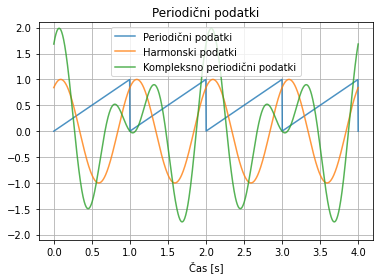

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t, dt = np.linspace(0,4,1000, retstep=True)

plt.title('Periodični podatki')
plt.plot(t, t%1, label='Periodični podatki', alpha=0.8) 
plt.plot(t, np.sin(2*np.pi*t+1), label='Harmonski podatki', alpha=0.8) 
plt.plot(t, np.sin(2*np.pi*t+1)+np.sin(3*np.pi*t+1), label='Kompleksno periodični podatki', alpha=0.8)
plt.ylim(-2.1,2.1)
plt.xlabel('Čas [s]')
plt.grid()
plt.legend()
plt.show()

Pri neperiodični podatkih, bomo spodaj prikazali prehodne podatke, ki npr. nastanejo, ko dinamski sistem vzbudimo z impulzno motnjo in le-ta nato izniha. Kaotičnih neperiodičnih tukaj ne bomo podrobneje obravnavali, zanje velja, da jih zaradi visoke stopnje dinamičnosti lahko zanesljivo napovedujemo samo za relativno kratek čas v naprej, potem pa se njihovo obnašanje zdi čedalje bolj naključno.

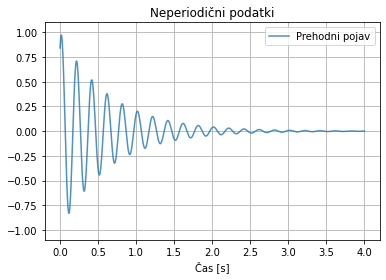

In [15]:
import numpy as np
import matplotlib.pyplot as plt


t, dt = np.linspace(0,4,1000, retstep=True)
omega = 10*np.pi
dušenje = 0.05

plt.title('Neperiodični podatki')

plt.plot(t, np.exp(-omega*dušenje*t)*np.sin(omega*t+1), label='Prehodni pojav', alpha=0.8) 
plt.ylim(-1.1,1.1)
plt.xlabel('Čas [s]')
plt.grid()
plt.legend()
plt.show()

Pri vzbujanju dinamskih sistemov pogosto uporabimo frekvenčni prelet (ali tudi žvižg); spodaj je prikazan linearni (frekvenca monotono narašča) žvižg od 1Hz do 5Hz v času 4s.

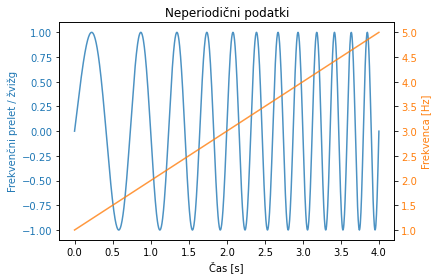

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pyExSi as es

t = np.linspace(0,4,1000)
x, _, fr = es.sine_sweep(time=t, freq_start=1, freq_stop=5, mode='linear', freq_return=True)

fig, ax1 = plt.subplots()
plt.title('Neperiodični podatki')

ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Frekvenčni prelet / žvižg', color='C0')
ax1.plot(t, x, color='C0', alpha=0.8)
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx() 
ax2.set_ylabel('Frekvenca [Hz]', color='C1')
ax2.plot(t, fr, color='C1', alpha=0.8) 
ax2.tick_params(axis='y', labelcolor='C1')
plt.show()

Pri analizi signalov nam občasno pomaga, da jih slišimo; spodaj lahko slišimo logaritemski žvižg od 100Hz do 2000Hz v 4s.

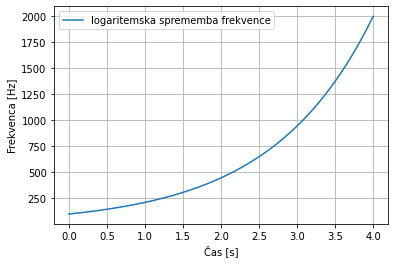

In [25]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

t = np.linspace(0,4,44000*4)
x, _, fr = es.sine_sweep(time=t, freq_start=100, freq_stop=2000, mode='logarithmic', freq_return=True)
display(Audio(data=x, rate=44000))

plt.plot(t, fr, label='logaritemska sprememba frekvence')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvenca [Hz]')
plt.grid()
plt.legend()
plt.show()

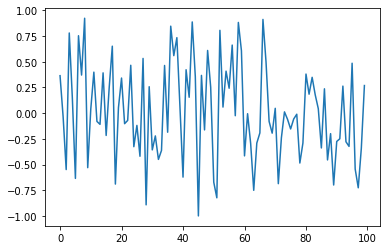

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pyExSi as es

N = 100
x = es.pseudo_random(N=N)
plt.plot(x)
plt.show()

### Nekateri primeri naključnih podatkov

Spodja slika prikazuje periodične podatke, najprej je prikazan trikotni signal, ki se ponavlja s periodo 1s, nato je prikazan harmonski signal, ki se prav tako ponavlja s periodo 1s. Zadnji signal predstavlja kompleksno periodične podatke, ki so sestavljeni kot vsota več harmonskih komponent, perioda tega na sliki je 2s.

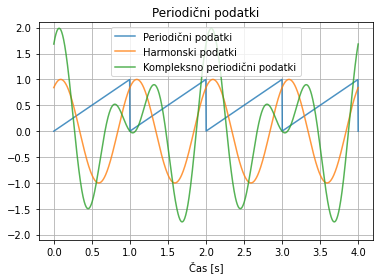

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t, dt = np.linspace(0,4,1000, retstep=True)

plt.title('Periodični podatki')
plt.plot(t, t%1, label='Periodični podatki', alpha=0.8) 
plt.plot(t, np.sin(2*np.pi*t+1), label='Harmonski podatki', alpha=0.8) 
plt.plot(t, np.sin(2*np.pi*t+1)+np.sin(3*np.pi*t+1), label='Kompleksno periodični podatki', alpha=0.8)
plt.ylim(-2.1,2.1)
plt.xlabel('Čas [s]')
plt.grid()
plt.legend();